<table style="width: 100%; border-style: none;">
<tr style="border-style: none">
<td style="border-style: none; width: 1%; font-size: 16px">Institut f&uuml;r Theoretische Physik<br /> Universit&auml;t zu K&ouml;ln</td>
<td style="border-style: none; width: 1%; font-size: 16px">&nbsp;</td>
<td style="border-style: none; width: 1%; text-align: right; font-size: 16px">Prof. Dr. Simon Trebst<br />Peter Br&ouml;cker</td>
</tr>
</table>
<hr>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">Computerphysik</h1>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">&Uuml;bungsblatt 4</h1>
<hr>
<h3 style="font-weight:bold; text-align: center; margin: 0px; padding:0px; margin-bottom: 20px;">Sommersemester 2016</h3>

**Website:** [http://www.thp.uni-koeln.de/trebst/Lectures/2016-CompPhys.shtml](http://www.thp.uni-koeln.de/trebst/Lectures/2016-CompPhys.shtml)

**Abgabe**: Montag, 9. Mai, 2016 vor der Vorlesung

**Name**: <font color="red">Bitte geben Sie ihren Namen an</font>

**Matrikelnummer**: <font color="red">Bitte geben Sie ihre Matrikelnummer an</font>

<table style="border-style: none; width: 100%"><tr style="border-style: none;">
<td style="border-style: none; width: 1%; font-size: 20px; font-weight: bold">Cache-Effekte</td>
<td style="border-style: none; width: 1%; text-align: right">(5 Punkte)</td></tr></table>



In der Vorlesung haben wir anhand einfacher physikalischer Überlegungen untersucht, wie schnell sich Informationen im Computer (maximal) ausbreiten können und was dies für die geometrische Anordnung etwa von CPU und Speicher bedeutet.
Illustrieren Sie diese Überlegungen für einen CPU Chip von 3cm Kantenlänge: Wie hoch darf die Taktfrequenz einer solchen CPU höchstens sein, damit die beiden am weitesten voneinander entferntesten Punkte des Chips wähnend eines Taktes noch Informationen austauschen können, also Information von einem Punkt zum anderen und wieder zurück übertragen können? Bedenken Sie dabei, dass die Leiterbahnen auf einem CHIP nicht diagonal sondern in Manhattan-Form (rechtwinklig) verlegt sind.

### Antwort
* Kantenlänge: $s = 3 \text{ cm} = 3\cdot10^{-2} \text{ m}$
* Datenübertragungsgeschwindigkeit: $v \approx c \approx 3\cdot10^8 \frac{\text{m}}{\text{s}}$
* Taktrate $f$

    $\Rightarrow f = \frac{v}{4s}$

    $\Rightarrow f = 3.75\cdot10^9 \text{ Hz} = 3.75 \text{ GHz}$

**Die Taktfrequenz darf höchstens 3.75 GHz groß sein.**

Um diesen elementaren Flaschenhals zu vermeiden, werden in modernen Chips verschiedene Speicher-Ebenen (sogenannte Cache-Level) verbaut, die in unmittelbarer Nähe zu den Rechen-Cores auf dem Chip angesiedelt werden.
In dieser Aufgabe wollen wir untersuchen, ob wir mit einem recht elementaren Programm diese Speicherstruktur sichtbar machen können. 

Untersuchen Sie dazu den folgenden von uns verlinkten C++ Code. Lesen Sie diesen detailliert kommentierten Quellcode, welchen Sie allein mit Ihren Julia-Kenntnissen verstehen können sollten, und beschreiben Sie in Worten den Ablauf des Programms. Skizzieren Sie dazu – ähnlich zu der in der Vorlesung verwandten Notation – einen Flussablauf des Programms.

```c
// Einbinden von Bibliotheken aehnlich zu "using" oder "import" in Julia
#include <iostream>
#include <sys/time.h>
#include <math.h>

// das Hauptprogramm
int main() {

    // Anzahl der Datenpunkte
    int steps = 18;

    for (int i = 0; i < steps; ++i) {
        // Groesse des Arrays
        int kbytes = int(pow(2., double(i)));
        int array_size = kbytes * 1024;

        // Array initialisieren, aequivalent zu zeros(array_size)
        unsigned int * array = new unsigned int[array_size];
        for (int j  = 0; j < array_size; ++j) array[j] = 0;

        // Messung starten
        clock_t start = clock();

        // Eigentlich eine Schleife, muss aus praktischen Gruenden
        // aufgeteilt werden
        for (int k = 0; k < (1024 * 4 - 1); ++k)
            for(int j = 0; j < 1024 * 1024; ++j)
                ++array[(j * 16) % array_size];
                
        // Messung stoppen
        clock_t elapsed = clock() - start;

        // Array loeschen, geschieht in Julia automatisch
        delete [] array;

        // Daten ausgeben
        std::cout << kbytes << " " << elapsed << std::endl;
    }
}
```

### Programmablauf
Zunächst werden die Module "iostream", "time.h" aus dem Ordner "sys" und "math.h" geladen. Dann wird die Funktion "main" definiert, die später geladen bzw. ausgeführt wird. Daraufhin wird festgelegt, wie viele Daten berechnet werden sollen, hier sind es 18. In einer *for*-Schleife wird dann folgendes für alle Werte von $i=0$ bis $i = \text{steps}-1$ gemacht:  

* Als erstes wird ein Array für Zahlen der Speichergröße von $2^i$ KB erstellt, wobei die Zahl doppelt so genau ist wie normal. Der Speicherplatz für diese Zahl ist also doppelt so groß wie normal. Dabei wird erst die Größe festgelegt, dann der Array für nichtnegative Zahlen (*unsigned integer*) definiert und jeweils der Wert $0$ gespeichert.  
* Dann wird eine Zeitmessung begonnen. Daraufhin wird eine weitere Schleife begonnen: 4096\*1048576-mal wird eine $1$ an eine spezifische Stelle im Array addiert.
* Es werden also ziemlich viele Rechnungen durchgeführt. Die dafür benötigte Zeit wird gestoppt und gespeichert. Dann wird der Array am Ende eines jeden Schleifendurchlaufs gelöscht. Dies ist notwendig, damit im nächsten Durchlauf der Array mit neuen Eigenschaften neu definiert werden kann.
* Zuletzt wird die Speichergröße einer jeden Zahl zusammen mit der gestoppten Zeit ausgegeben. Die letzte Befehlszeile ("*std::$\dots$::endl;*") enspricht *println(kbytes, " ", elapsed)*.

Den Begriff "Speichergröße" verwende ich hier für den Speicherplatz, der für die Zahl reserviert wird. Es ist ähnlich der *word size*. Z.B. ist die Speichergröße für *Int64* in Julia 64B.

### Flussdiagramm

### Sinn des Programms
Dieses Programm ist dazu gedacht, die Zeit für lange Rechnungen zu ermitteln. Das Berechnen und Speichern von großen Zahlen dient allein dazu, den Rechner zu beschäftigen. Somit kann die Zeit für längere Rechenoperationen gemessen und ausgegeben werden. Diese Ausgabe wird in dem Bash-Skript, das weiter unten aufgerufen wird, in einer Datei gespeichert.

Dieses Programm finden Sie außerdem in Ihrem git Verzeichnis. Mit dem Ausführen der nächsten Zeile wird ein Skript gestartet, mit dem dieses Programm kompiliert und gestartet wird. Dieser Prozess wird ca. 10 Minuten dauern und hängt auch davon ab, wie ausgelastet der JuliaBox-Server ist. 

In [1]:
# why shall this code be used?
#run(`chmod +x ./04_cache_effekte.sh`)
#run(`./04_cache_effekte.sh`)

# why not like this?
# just comments, because done already
#run(`bash 04_cache_effekte.sh`)

Wir nutzen nun das Paket *DataFrames*, um die Ausgabe des Programms zu verarbeiten und grafisch darzustellen. 

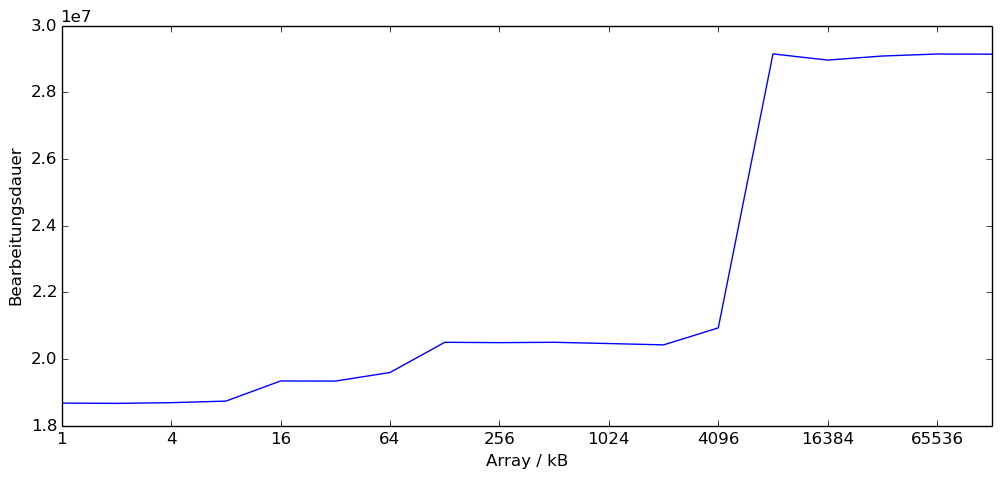

In [2]:
using DataFrames
using PyPlot

figure(figsize=(12, 5))
data = readtable("04_cache_effekte.csv", separator=' ', header=false)
x_values = [Int(2^x) for x in log2(data[:, 1])]
plot(x_values, data[:, 2])
gca()[:set_xscale]("log", basex=2)
xticks(x_values[1:2:end], [string(x) for x in x_values][1:2:end])
xlabel("Array / kB")
ylabel("Bearbeitungsdauer")
;

### Erklären Sie den Verlauf der Kurve. Schätzen Sie die Größen der einzelnen Cachelevel ab.

Mithilfe der Bearbeitungsdauer kann man abschätzen, welcher CPU-Cache wann benutzt wird. Zunächst wird der *L1*-Cache benutzt, der eine sehr geringe Größe hat und in den Kernen der CPU liegt. Danach wird der *L2*-Cache benutzt, der größer ist und an den Kernen liegt; zuletzt wird der *L3*-Cache genutzt, der der größte der Caches ist und in der gesamten CPU liegt. Zum Schluss muss das RAM genutzt werden, welches außerhalb der CPU verbaut ist.

* Für sehr Datenmengen bis zu 8 kB bleibt die Rechenzeit konstant gering, hierbei wird wohl der *L1*-Cache benutzt.
* Daraufhin steigt die Berabeitungsdauer an, wohl weil die Daten weiter geschickt werden müssen. Dies bedeutet, dass nun der nächste Cache, *L2*, genutzt wird. Hierbei kommt es zu Schwankungen, die vermutlich mit Ungenauigkeiten und der Art der Verwendung des Caches zu erklären sind.
* Im Bereich von ca. 128 kB bis ca. 4096 kB bleibt die Zeit wieder in etwa konstant. Hieraus lässt sich schließen, dass in dem Datenbereich der *L3*-Cache genutzt wird.
* Zum Schluss kommt es zu einem Sprung im Graphen um etwa 1 s, was sehr viel im Vergleich zu den anderen Änderungen ist. Daher wird nun wohl das RAM verwendet, weil auch der *L3* voll ist.

Daraus lässt sich schließen, dass der **L1 8 kB**, der **L2 128 kB** und der **L3 4 MB** Speicher umfassen.